In [3]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:

bsd = datasets.load_boston()
X = bsd.data
X = pd.DataFrame(X,columns=bsd.feature_names)
y = bsd.target

r2 score: 0.9333777847315088
r2 score: 0.9333777847315088
rmse 2.502774401821114


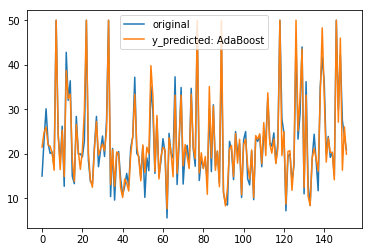

In [5]:
# attempt 1
np.random.seed(6)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

clf1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10))
clf1.fit(X_train, y_train)
print('r2 score:', clf1.score(X_test, y_test))  # R^2 coefficient of determination
print('r2 score:', r2_score(y_test, clf1.predict(X_test)))
print('rmse',np.sqrt(mean_squared_error(y_test, clf1.predict(X_test))))
plt.figure()
plt.plot(y_test)
plt.plot(clf1.predict(X_test))
plt.legend(['original','y_predicted: AdaBoost'])


[-7.80489904e-02  4.79410904e-02 -4.72665506e-02  2.67767887e+00
 -1.32182660e+01  3.54097061e+00 -6.81127487e-03 -1.57473009e+00
  2.95420733e-01 -1.40593268e-02 -9.46588170e-01  8.56038500e-03
 -5.24416221e-01] 37.987786855498534
0.6987066336043728
r2 score:  0.6987066336043728
rmse 5.322393188459646


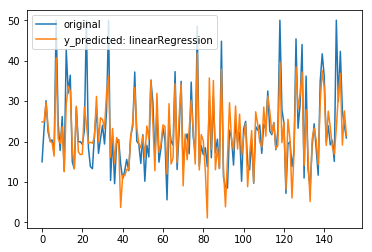

In [6]:
# attempt 2
np.random.seed(6)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3)
from sklearn.linear_model import LinearRegression
clf2 = LinearRegression()
clf2.fit(X_train, y_train)
print(clf2.coef_, clf2.intercept_)
plt.figure()
plt.plot(y_test)
plt.plot(clf2.predict(X_test))
print(clf2.score(X_test, y_test))
print('r2 score: ',r2_score(y_test, clf2.predict(X_test)))
print('rmse',np.sqrt(mean_squared_error(y_test, clf2.predict(X_test))))
plt.legend(['original','y_predicted: linearRegression'])



0.6987066336043729
0.6987066336043729


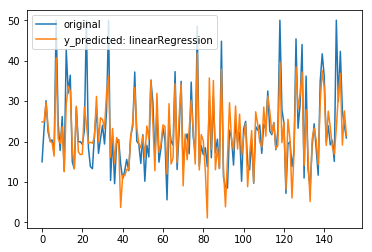

In [7]:
# attempt 3

## test scale
np.random.seed(6)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3)
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
clf3 = LinearRegression()
clf3.fit(X_train, y_train)

plt.figure()
plt.plot(y_test)
X_test = scale.transform(X_test)
print(clf3.score(X_test, y_test))
print(r2_score(y_test, clf3.predict(X_test)))
plt.plot(clf3.predict(X_test))
plt.legend(['original','y_predicted: linearRegression'])



0.42433441319138276


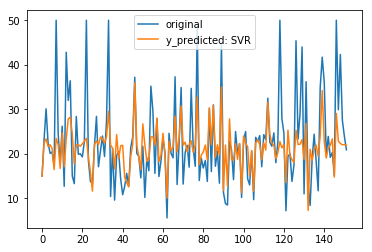

In [10]:
# attempt 4

# test model
np.random.seed(6)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3)
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
gamma_range = np.logspace(-2,2,10)
C_range = np.logspace(-3,1,10)
para_grid = dict(gamma=gamma_range, C = C_range)
modl = GridSearchCV(SVR(kernel='rbf'), para_grid, cv=5)
modl.fit(X_train, y_train)

clf4 = SVR(gamma=modl.best_params_['gamma'], C = modl.best_params_['C'])
clf4.fit(X_train, y_train)
print(clf4.score(X_test,y_test))
plt.figure()
plt.plot(y_test)
plt.plot(clf4.predict(X_test))
plt.legend(['original','y_predicted: SVR'])